## I. Finding the distance between two points.
Finding the euclidean distance between 2 points expressed as Numpy arrays.

In [1]:
import numpy as np

In [2]:
def distance(p1, p2):
    """Find the distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

We'll be using column vectors to define our points, as they're easier to work with in numpy.

In [3]:
p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.242640687119285

## II. Majority Vote

In [4]:
from collections import Counter
import scipy.stats as ss

In [5]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2]

In [6]:
def majority_vote(votes):
    """
    Return the most common element in votes.
    """
    vote_counts = Counter(votes)
    return max(vote_counts, key=vote_counts.get)

In [7]:
def majority_vote_short(votes):
    """
    Return the most common element in votes.
    """
    mode, count = ss.mstats.mode(votes)
    return mode

In [8]:
majority_vote(votes)

3

In [9]:
majority_vote_short(votes)

array([3.])

## III. Finding Nearest Neighbors

In [10]:
import matplotlib.pyplot as plt

In [11]:
# points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
# p = np.array([2.5, 2])
# plt.plot(points[:,0], points[:,1], "ro")
# plt.plot(p[0], p[1], "bo")
# plt.axis([0.5, 3.5, 0.5, 3.5])
# plt.show();

In [12]:
def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [13]:
# ind = find_nearest_neighbors(p, points, 2)
# points[ind]

In [14]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [15]:
# outcomes = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
# knn_predict(p, points, outcomes)

## IV. Generating Synthetic Data

In [16]:
def generate_synth_data(n=50):
    """
    Create two sets of points from bivariate normal distributions.
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)

In [17]:
# n = 20
# plt.figure()
# p, o = generate_synth_data(n)
# plt.plot(p[:n,0], p[:n,1], "ro")
# plt.plot(p[n:,0], p[n:,1], "bo")
# plt.show();

## V. Making a prediction grid

In [18]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """
    Classify each point on the prediction grid.
    """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
            
    return (xx, yy, prediction_grid)

## VI. Plotting the Prediction Grid

In [19]:
def plot_prediction_grid (xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.show()

In [20]:
(predictors, outcomes) = generate_synth_data()

In [21]:
limits = (-3, 4, -3, 4)
h = 0.1
k1 = 5
k2 = 50

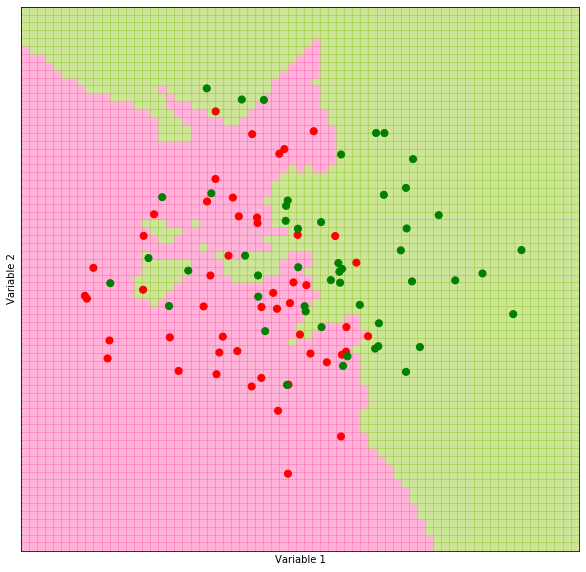

In [22]:
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k1)
plot_prediction_grid(xx, yy, prediction_grid)

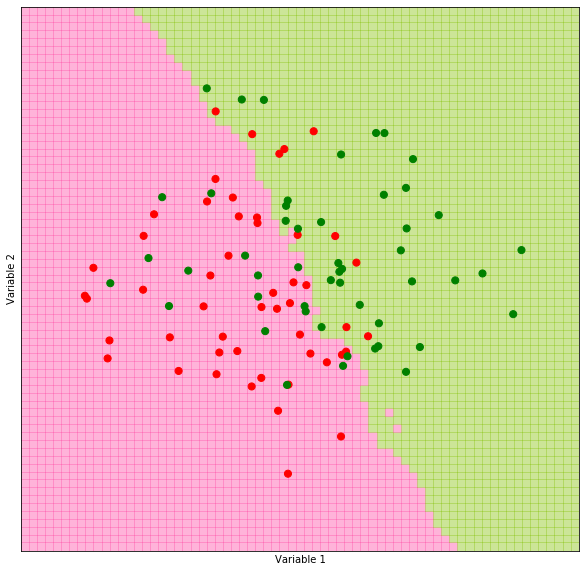

In [23]:
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k2)
plot_prediction_grid(xx, yy, prediction_grid)

## VII. Applying the kNN Method

In [24]:
from sklearn import datasets

In [25]:
iris = datasets.load_iris()

In [26]:
predictors = iris.data[:, 0:2]

In [27]:
outcomes = iris.target

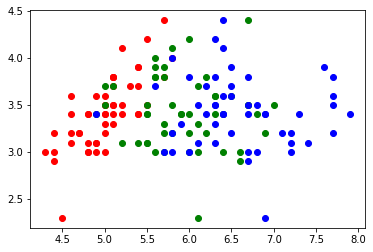

In [28]:
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==0][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==0][:,1], "bo")
plt.show();

In [29]:
limits = (4, 8, 1.5, 4.5)
h = 0.1
k = 5

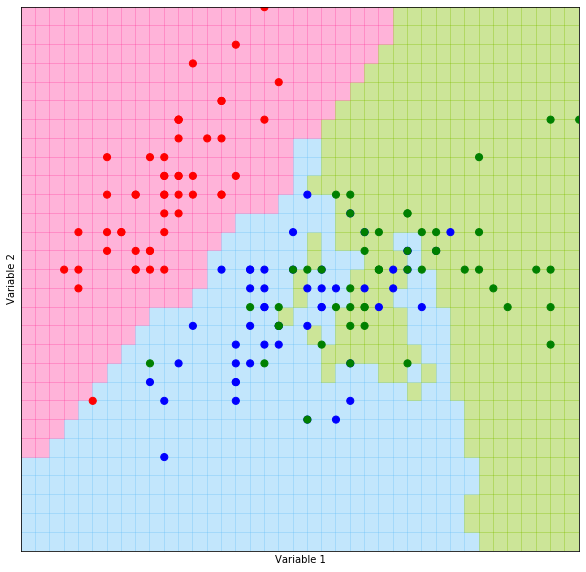

In [30]:
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [46]:
sk_predictions.shape

(150,)

In [47]:
sk_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

Percentage similarity between predictions made by ScikitLearn's kNN Classified and Homemade kNN Classifier.

In [54]:
100*(np.mean(sk_predictions == my_predictions))

96.0

#### Accuracy of sklearn kNN Classifier

In [57]:
round(100*(np.mean(sk_predictions == outcomes)), 2)

83.33

#### Accuracy of homemade kNN Classifier

In [58]:
round(100*(np.mean(my_predictions == outcomes)), 2)

84.67